✅ 锁定数据文件夹: mcm26Train-B-Data，开始全量分析...

------------------------------------------------
1️⃣ 处理: hall_calls.csv (核心需求)


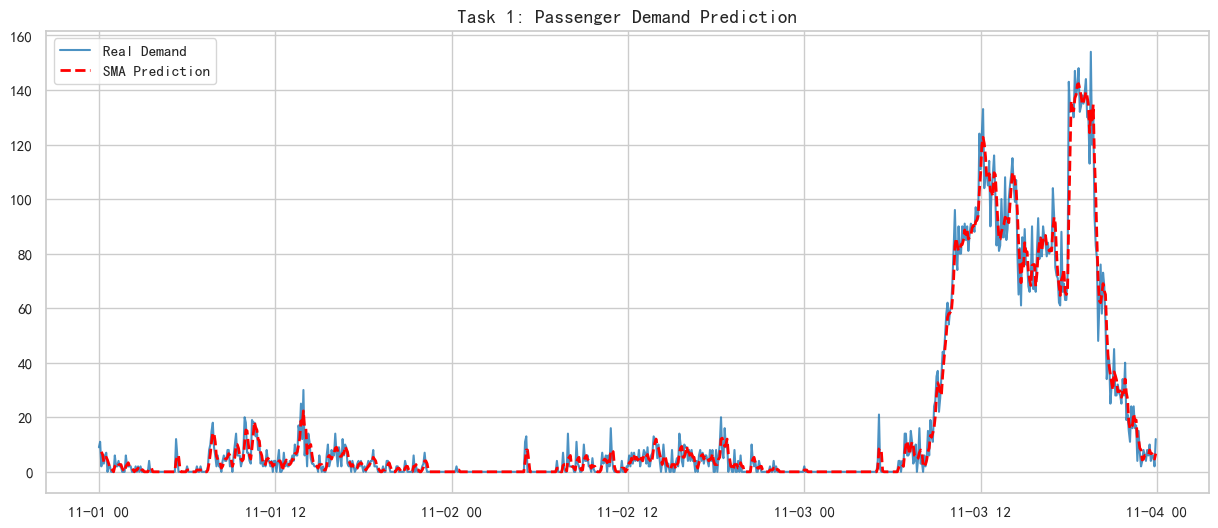

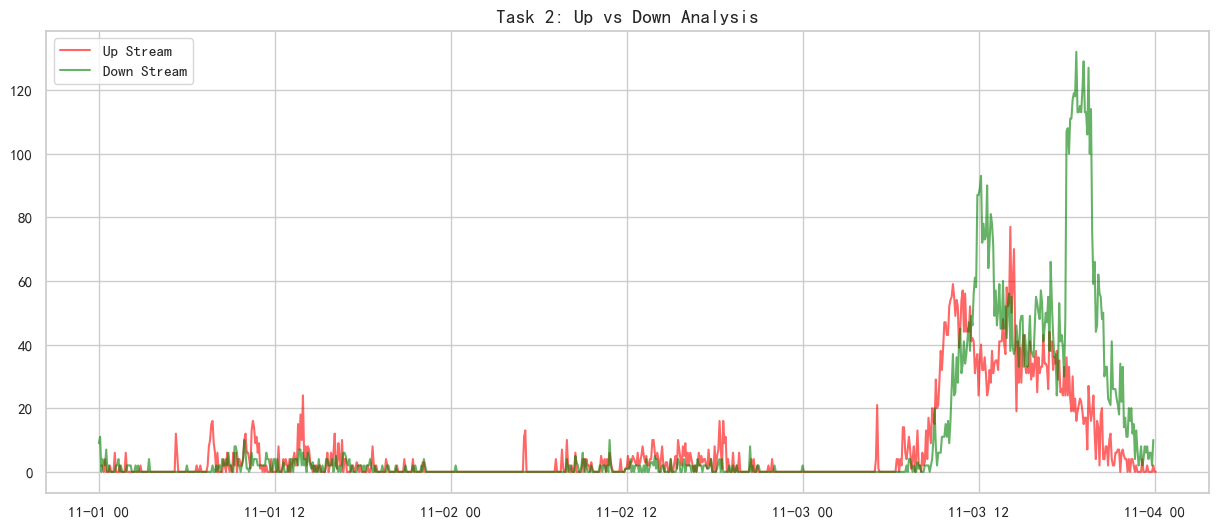


------------------------------------------------
2️⃣ 处理: load_changes.csv (载重)


C:\Users\ROG\AppData\Local\Temp\ipykernel_36580\2115687109.py:65: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  load_trend = df_load.set_index('Time').resample('1H')['Load In (kg)'].mean().fillna(0)


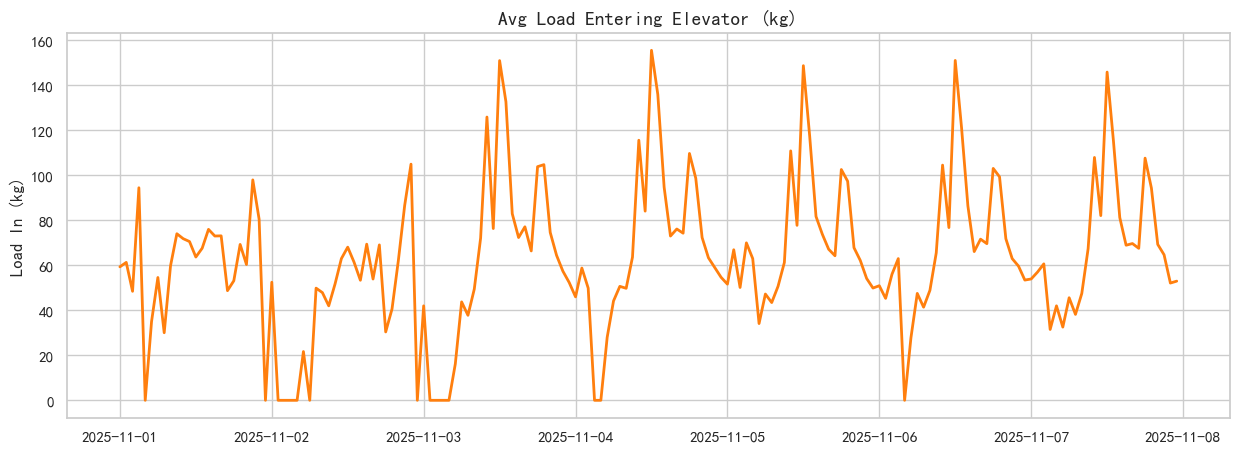


------------------------------------------------
3️⃣ 处理: car_stops.csv (停靠热点)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9243: invalid continuation byte

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==========================================
# 🔧 0. 全局配置
# ==========================================
DATA_FOLDER = 'mcm26Train-B-Data'  
sns.set(style="whitegrid")         
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial'] 
plt.rcParams['axes.unicode_minus'] = False

# 定义一个“万能读取函数”，自动处理编码问题
def read_csv_safe(file_path):
    try:
        # 先试着用默认的 utf-8
        return pd.read_csv(file_path)
    except UnicodeDecodeError:
        try:
            # 如果报错，试试 gbk (中文 Windows 常用)
            return pd.read_csv(file_path, encoding='gbk')
        except:
            # 如果还报错，用 latin1 (最强兼容，肯定能读，但中文可能会乱码)
            return pd.read_csv(file_path, encoding='latin1')

if not os.path.exists(DATA_FOLDER):
    print(f"❌ 严重错误：找不到文件夹 '{DATA_FOLDER}'")
else:
    print(f"✅ 锁定数据文件夹: {DATA_FOLDER}，开始全量分析...\n")

# ==========================================
# 📊 Part 1: 核心需求 (hall_calls.csv)
# ==========================================
file_hall = os.path.join(DATA_FOLDER, 'hall_calls.csv')
if os.path.exists(file_hall):
    print("------------------------------------------------")
    print("1️⃣ 处理: hall_calls.csv (核心需求)")
    
    # ✅ 使用万能读取函数
    df_hall = read_csv_safe(file_hall) 
    df_hall['Time'] = pd.to_datetime(df_hall['Time'])
    
    # [Task 1] 流量预测
    traffic_data = df_hall.set_index('Time').resample('5min').size().to_frame(name='Passenger_Count').fillna(0)
    traffic_data['Prediction'] = traffic_data['Passenger_Count'].rolling(window=3).mean()
    
    plt.figure(figsize=(15, 6))
    points = 3 * 24 * 12 
    plt.plot(traffic_data.index[:points], traffic_data['Passenger_Count'][:points], label='Real Demand', color='#1f77b4', alpha=0.8)
    plt.plot(traffic_data.index[:points], traffic_data['Prediction'][:points], label='SMA Prediction', color='red', linestyle='--', linewidth=2)
    plt.title('Task 1: Passenger Demand Prediction', fontsize=14)
    plt.legend()
    plt.savefig('Analysis_1_Prediction.png', dpi=300, bbox_inches='tight')
    plt.show()

    # [Task 2] 上下行
    up_flow = df_hall[df_hall['Direction'] == 'Up'].set_index('Time').resample('5min').size()
    down_flow = df_hall[df_hall['Direction'] == 'Down'].set_index('Time').resample('5min').size()
    
    plt.figure(figsize=(15, 6))
    plt.plot(up_flow.index[:points], up_flow[:points], color='red', alpha=0.6, label='Up Stream')
    plt.plot(down_flow.index[:points], down_flow[:points], color='green', alpha=0.6, label='Down Stream')
    plt.title('Task 2: Up vs Down Analysis', fontsize=14)
    plt.legend()
    plt.savefig('Analysis_2_UpDown.png', dpi=300, bbox_inches='tight')
    plt.show()

# ==========================================
# ⚖️ Part 2: 载重分析 (load_changes.csv)
# ==========================================
file_load = os.path.join(DATA_FOLDER, 'load_changes.csv')
if os.path.exists(file_load):
    print("\n------------------------------------------------")
    print("2️⃣ 处理: load_changes.csv (载重)")
    
    # ✅ 使用万能读取函数
    df_load = read_csv_safe(file_load)
    df_load['Time'] = pd.to_datetime(df_load['Time'])
    
    load_trend = df_load.set_index('Time').resample('1H')['Load In (kg)'].mean().fillna(0)
    
    plt.figure(figsize=(15, 5))
    plt.plot(load_trend.index[:24*7], load_trend[:24*7], color='#ff7f0e', linewidth=2)
    plt.title('Avg Load Entering Elevator (kg)', fontsize=14)
    plt.ylabel('Load In (kg)')
    plt.savefig('Analysis_3_Load.png', dpi=300, bbox_inches='tight')
    plt.show()

# ==========================================
# 🏢 Part 3: 楼层热力 (car_stops.csv)
# ==========================================
file_stops = os.path.join(DATA_FOLDER, 'car_stops.csv')
if os.path.exists(file_stops):
    print("\n------------------------------------------------")
    print("3️⃣ 处理: car_stops.csv (停靠热点)")
    
    # ✅ 使用万能读取函数
    df_stops = read_csv_safe(file_stops)
    floor_counts = df_stops['Floor'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=floor_counts.index, y=floor_counts.values, palette='viridis')
    plt.title('Floor Hotspots (Stops)', fontsize=14)
    plt.savefig('Analysis_4_Stops.png', dpi=300, bbox_inches='tight')
    plt.show()

# ==========================================
# 🎯 Part 4: 目的地分析 (car_calls.csv)
# ==========================================
file_cc = os.path.join(DATA_FOLDER, 'car_calls.csv')
if os.path.exists(file_cc):
    print("\n------------------------------------------------")
    print("4️⃣ 处理: car_calls.csv (目的地)")
    
    # ✅ 使用万能读取函数
    df_cc = read_csv_safe(file_cc)
    dest_counts = df_cc['Floor'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 5))
    sns.barplot(x=dest_counts.index, y=dest_counts.values, color='#9467bd')
    plt.title('Destination Analysis', fontsize=14)
    plt.savefig('Analysis_5_Destinations.png', dpi=300, bbox_inches='tight')
    plt.show()

# ==========================================
# ⚙️ Part 5: 负载均衡 (car_departures.csv)
# ==========================================
file_dep = os.path.join(DATA_FOLDER, 'car_departures.csv')
if os.path.exists(file_dep):
    print("\n------------------------------------------------")
    print("5️⃣ 处理: car_departures.csv (工作量)")
    
    # ✅ 使用万能读取函数
    df_dep = read_csv_safe(file_dep)
    workload = df_dep['Elevator ID'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=workload.index, y=workload.values, palette='magma')
    plt.title('Workload Balance (Trips per Elevator)', fontsize=14)
    plt.xlabel('Elevator ID')
    plt.savefig('Analysis_6_Workload.png', dpi=300, bbox_inches='tight')
    plt.show()

# ==========================================
# 🔧 Part 6: 维修记录 (maintenance_mode.csv)
# ==========================================
file_maint = os.path.join(DATA_FOLDER, 'maintenance_mode.csv')
if os.path.exists(file_maint):
    print("\n------------------------------------------------")
    print("6️⃣ 处理: maintenance_mode.csv (维修)")
    
    # ✅ 使用万能读取函数
    df_maint = read_csv_safe(file_maint)
    maint_counts = df_maint['Elevator ID'].value_counts().sort_index()
    
    if len(maint_counts) > 0:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=maint_counts.index, y=maint_counts.values, color='red')
        plt.title('Maintenance Events per Elevator', fontsize=14)
        plt.xlabel('Elevator ID')
        plt.savefig('Analysis_7_Maintenance.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("   -> 无维修记录")

print("\n✅ 全量分析完成！编码问题已自动修复。")